<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bib" data-toc-modified-id="Bib-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bib</a></span></li><li><span><a href="#Plot-FFP-vs-MBC---One-type" data-toc-modified-id="Plot-FFP-vs-MBC---One-type-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot FFP vs MBC - One type</a></span><ul class="toc-item"><li><span><a href="#figure" data-toc-modified-id="figure-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>figure</a></span></li></ul></li></ul></div>

## Bib

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plot FFP vs MBC - One type

In [2]:
folder_files = "scripts"
names_ffp = ['N', 'time_1', 'space_1', 'time_2', 'space_2',
            'time_4', 'space_4', 'time_8', 'space_8']
mbc_file = pd.read_csv(os.path.join("mbc_1.txt"), delimiter="\t", names=names_ffp[:3])
ffp_file = pd.read_csv(os.path.join("ffp_1.txt"), delimiter="\t", names=names_ffp[:])

In [3]:
N_arr = mbc_file["N"]
mbc_k1 = mbc_file["time_1"]
ffp_k1 = ffp_file["time_1"]
ffp_k2 = ffp_file["time_2"]
ffp_k4 = ffp_file["time_4"]
ffp_k8 = ffp_file["time_8"]

### figure

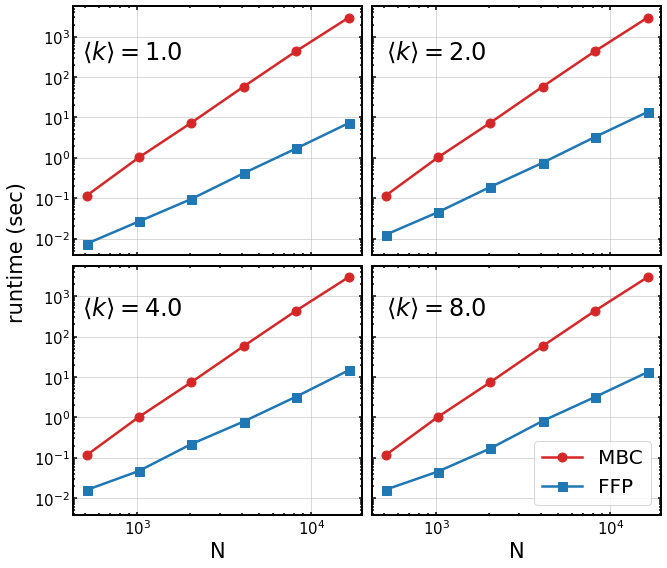

In [38]:
fig, ax = plt.subplots(2,2, figsize=(9,8), sharex=True, sharey=True)

ax[0,0].plot(N_arr, mbc_k1, marker="o", ms=9, lw=2.5, color="tab:red")
ax[0,0].plot(N_arr, ffp_k1, marker="s", ms=9, lw=2.5, color="tab:blue")
# ----------------------- #
ax[0,1].plot(N_arr, mbc_k1, marker="o", ms=9, lw=2.5, color="tab:red")
ax[0,1].plot(N_arr, ffp_k2, marker="s", ms=9, lw=2.5, color="tab:blue")
# ----------------------- #
ax[1,0].plot(N_arr, mbc_k1, marker="o", ms=9, lw=2.5, color="tab:red")
ax[1,0].plot(N_arr, ffp_k4, marker="s", ms=9, lw=2.5, color="tab:blue")
# ----------------------- #
ax[1,1].plot(N_arr, mbc_k1, marker="o", ms=9, lw=2.5,color="tab:red", label='MBC')
ax[1,1].plot(N_arr, ffp_k8, marker="s", ms=9, lw=2.5, color="tab:blue", label='FFP')

ax[1,0].set_xlabel("N", fontsize=21)
ax[1,1].set_xlabel("N", fontsize=21)
#ax[0,0].set_ylabel("runtime (sec)", fontsize=16)
#ax[1,0].set_ylabel("runtime (sec)", fontsize=16)

fig.text(-0.025, 0.44, "runtime (sec)", fontsize=21, rotation='vertical')
#fig.text(0.5, 0.005, "N", fontsize=21, rotation='horizontal')
fig.text(0.09, 0.89, r'$\langle k \rangle = 1.0$', fontsize=24)
fig.text(0.56, 0.89, r'$\langle k \rangle = 2.0$', fontsize=24)
fig.text(0.09, 0.445, r'$\langle k \rangle = 4.0$', fontsize=24)
fig.text(0.56, 0.445, r'$\langle k \rangle = 8.0$', fontsize=24)
ax[1,1].legend(loc=4, prop={'size':'20'})

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_xscale('log')
        ax[i,j].set_yscale('log')
        ax[i,j].grid(True, alpha=0.6)
        ax[i,j].tick_params(which='both', top=True, right=True, 
                        width=1.5, direction='in', labelsize=15)
        for k in ['left', 'right', 'bottom', 'top']:
            ax[i,j].spines[k].set_linewidth(2)
        

plt.subplots_adjust(wspace=0.075, hspace=0.075)
plt.tight_layout()
fig.savefig("ffp_mbc_onetype_gridon.pdf", bbox_inches="tight")